In [242]:
#import the libraries
import pandas as pd 
import numpy as np #linear algebra

In [243]:
# import talib it is a technical analysis library, which will be used to compute the RSI and Williams %R. 
#These will be used as features for training our artificial neural network. We could add more features using this library.

In [244]:
import random 
random.seed(42)

In [245]:
dataset = pd.read_csv('C:/Users/mayank/Downloads/RELIANCE.NS.csv')

In [246]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-11,1259.000000,1268.400024,1234.250000,1237.699951,1230.883545,10874768
1,2018-09-12,1251.800049,1258.699951,1228.849976,1252.500000,1245.602173,8065553
2,2018-09-14,1259.400024,1275.599976,1247.650024,1253.150024,1246.248535,7878583
3,2018-09-17,1250.750000,1250.750000,1221.599976,1225.900024,1219.148682,6754086
4,2018-09-18,1226.000000,1239.400024,1214.349976,1217.150024,1210.446777,7616412
5,2018-09-19,1224.000000,1224.000000,1201.000000,1210.750000,1204.082031,11265786
6,2018-09-21,1219.000000,1237.400024,1183.500000,1217.500000,1210.794922,19070172
7,2018-09-24,1214.449951,1239.900024,1204.500000,1232.050049,1225.264771,10102589
8,2018-09-25,1235.500000,1245.000000,1195.000000,1230.599976,1223.822754,9715020
9,2018-09-26,1239.000000,1253.949951,1227.150024,1251.400024,1244.508179,6396828


In [247]:
dataset = dataset[['Open', 'High', 'Low', 'Close']]

In [248]:
dataset.dtypes

Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [249]:
dataset['H-L'] = dataset['High'] - dataset['Low']
dataset['O-C'] = dataset['Close'] - dataset['Open']
dataset['3day MA'] = dataset['Close'].shift(1).rolling(window = 3).mean()
dataset['10day MA'] = dataset['Close'].shift(1).rolling(window = 10).mean()
dataset['30day MA'] = dataset['Close'].shift(1).rolling(window = 30).mean()
dataset['Std_dev']= dataset['Close'].rolling(5).std()
#dataset['RSI'] = talib.RSI(dataset['Close'].values, timeperiod = 9)
#dataset['Williams %R'] = talib.WILLR(dataset['High'].values, dataset['Low'].values, dataset['Close'].values, 7)

C:\Users\mayank\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mayank\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [250]:
dataset['Price_Rise'] = np.where(dataset['Close'].shift(-1) > dataset['Close'], 1, 0)

In [251]:
dataset.dropna()

,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise
30,1046.000000,1093.849976,1046.000000,1087.800049,47.849976,41.800049,1040.483358,1092.150024,1158.638342,21.358387,0
31,1085.500000,1085.500000,1052.099976,1057.000000,33.400024,-28.500000,1054.500041,1088.275024,1153.641679,21.434439,1
32,1059.000000,1065.849976,1047.000000,1061.250000,18.849976,2.250000,1063.233358,1080.000024,1147.125012,21.198113,0
33,1067.900024,1067.900024,1050.000000,1056.250000,17.900024,-11.650024,1068.683350,1069.745019,1140.728345,15.930386,1
34,1067.000000,1081.000000,1063.150024,1074.900024,17.849976,7.900024,1058.166667,1060.240015,1135.073344,13.626347,1
35,1073.449951,1092.699951,1065.000000,1090.300049,27.699951,16.850098,1064.133341,1057.600012,1130.331677,14.573173,1
36,1094.000000,1112.000000,1091.599976,1104.099976,20.400024,10.099976,1073.816691,1060.365015,1126.316679,19.960504,1
37,1115.000000,1115.000000,1106.699951,1110.699951,8.300049,-4.300049,1089.766683,1065.305017,1122.536678,22.116999,0
38,1106.250000,1113.800049,1085.000000,1093.449951,28.800049,-12.800049,1101.699992,1071.800012,1118.491675,13.759712,0
39,1097.699951,1098.800049,1074.550049,1080.000000,24.250000,-17.699951,1102.749959,1078.065002,1113.920007,12.002810,1


In [252]:
X = dataset.iloc[:, 4:-1]
y = dataset.iloc[:, -1]

In [147]:
dataset.dtypes

Open          float64
High          float64
Low           float64
Close         float64
H-L           float64
O-C           float64
3day MA       float64
10day MA      float64
30day MA      float64
Std_dev       float64
Price_Rise      int32
dtype: object

In [148]:
#.isnull()
#dataset.dropna()

In [149]:
#np.isnan(dataset)

In [150]:
#np.nan_to_num(dataset) 

In [151]:
#np.where(dataset.values >= np.finfo(np.float64).max)

C:\Users\mayank\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.


(array([], dtype=int64), array([], dtype=int64))

In [152]:
split = int(len(dataset)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [161]:
X_train = X_train.dropna()

In [209]:
y_train = dataset.iloc[79:,-1]

In [210]:
len(y_train)

163

In [211]:
len(y_test)

49

In [212]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Another important step in data preprocessing is to standardize the dataset. This process makes the mean of all the input features equal to zero and also converts their variance to 1. This ensures that there is no bias while training the model due to the different scales of all input features. If this is not done the neural network might get confused and give a higher weight to those features which have a higher average value than others.

In [193]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [194]:
classifier = Sequential()   #This will be used to sequentially build the layers of the neural networks learning.

In [195]:
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))

In [196]:
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))

In [197]:
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))


In [198]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [199]:
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])


In [214]:
classifier.fit(X_train, y_train, batch_size = 6, epochs = 60)


Epoch 1/60
163/163 [==============================] - 0s 3ms/step - loss: 0.0531 - acc: 0.9387
Epoch 2/60
163/163 [==============================] - 0s 2ms/step - loss: 0.0788 - acc: 0.8957
Epoch 3/60
163/163 [==============================] - ETA: 0s - loss: 0.1581 - acc: 0.808 - 0s 2ms/step - loss: 0.1589 - acc: 0.8037
Epoch 4/60
163/163 [==============================] - 0s 2ms/step - loss: 0.1233 - acc: 0.8282A: 0s - loss: 0.1022 - acc: 0.8
Epoch 5/60
163/163 [==============================] - 0s 2ms/step - loss: 0.0919 - acc: 0.8896
Epoch 6/60
163/163 [==============================] - 0s 2ms/step - loss: 0.0693 - acc: 0.9141
Epoch 7/60
163/163 [==============================] - 0s 2ms/step - loss: 0.0704 - acc: 0.9141
Epoch 8/60
163/163 [==============================] - 0s 1ms/step - loss: 0.0590 - acc: 0.9387
Epoch 9/60
163/163 [==============================] - 0s 2ms/step - loss: 0.0575 - acc: 0.9325
Epoch 10/60
163/163 [==============================] - 0s 1ms/step - loss: 0

In [221]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [224]:
dataset['y_pred'] = np.NaN

In [229]:
dataset.iloc[(len(dataset) - len(y_pred)):,-1] = y_pred


In [232]:
trade_dataset = dataset.dropna()

In [233]:
trade_dataset['Tomorrows Returns'] = 0.
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['Close']/trade_dataset['Close'].shift(1))
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)

C:\Users\mayank\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mayank\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mayank\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [235]:
trade_dataset['Strategy Returns'] = np.where(trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])


C:\Users\mayank\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [236]:
trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])

C:\Users\mayank\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mayank\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


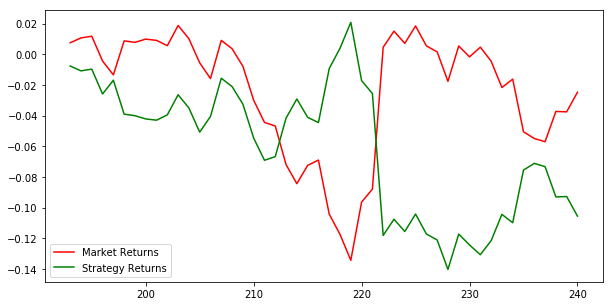

In [238]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(trade_dataset['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_dataset['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()

In [240]:
#now we predict the stock price using ligistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

C:\Users\mayank\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [241]:
lr = LogisticRegression()

In [253]:
X = dataset.iloc[:, 4:-1]
y = dataset.iloc[:, -1]

In [254]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)

In [352]:
#df1['Price_Rise'] = np.where(df1['Close'].shift(-1) > df1['Close'], 1, 0)

In [365]:
#df1[['3day MA', '10day MA', '30day MA', 'Std_dev', 'Price_Rise']].fillna((df1[['3day MA', '10day MA', '30day MA', 'Std_dev', 'Price_Rise']].mean()), inplace=True)


In [364]:
#df1 = df1[['Open','High','Low','Close','H-L','O-C','3day MA','10day MA','30day MA','Std_dev','Price_Rise']]

In [345]:
#y_train = df.iloc[79:,-1

In [392]:
dt = pd.read_csv('C:/Users/mayank/Downloads/RELIANCE.NS.csv')

In [393]:
dt = dt[['Open','High','Low','Close']]

In [394]:
dt = dt.dropna()

In [395]:
dt['H-L'] = dt['High'] - dt['Low']
dt['O-C'] = dt['Close'] - dt['Open']
dt['3day MA'] = dt['Close'].shift(1).rolling(window = 3).mean()
dt['10day MA'] = dt['Close'].shift(1).rolling(window = 10).mean()
dt['30day MA'] = dt['Close'].shift(1).rolling(window = 30).mean()
dt['Std_dev']= dt['Close'].rolling(5).std()

In [396]:
dt = dt.dropna()

In [397]:
dt['Price_Rise'] = np.where(dt['Close'].shift(-1) > dt['Close'], 1, 0)

In [403]:
dt =dt.dropna()

In [410]:
X = dt.iloc[:, 4:-1]
y = dt.iloc[:, -1]

In [411]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [412]:
lr = LogisticRegression()

In [474]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=0)

In [484]:
len(X_train)

190

In [476]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [477]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [478]:
prediction = lr.predict(X_test)

In [479]:
from sklearn.metrics import confusion_matrix

In [480]:
confusion_matrix(y_test, prediction)

array([[10,  0],
       [ 9,  3]], dtype=int64)

In [481]:
from sklearn.metrics import accuracy_score 

In [482]:
accuracy_score(y_test, prediction)

0.5909090909090909

In [ ]:
# we need to more data to increase the accuracy